### 快速指南
使用subplots()和gridspec来创建一个2x2的网格.

<class 'matplotlib.gridspec.GridSpec'>
<class 'matplotlib.gridspec.SubplotSpec'>


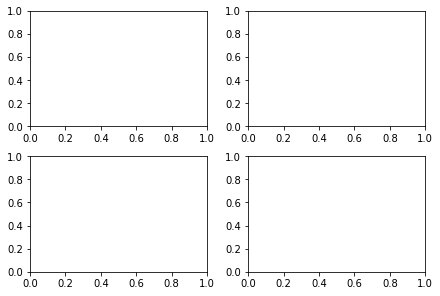

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
# print(f1_axes) # 四个

fig2 = plt.figure(constrained_layout=True)
# gridspec实例可以通过像numpy一样使用索引和切片进行访问，好处是更为灵活（根据切片来创建子图的尺寸范围），缺点是代码比较繁琐
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2) 
print(type(spec2))
print(type(spec2[0, 0]))
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])
plt.show()

<class 'matplotlib.gridspec.GridSpec'>


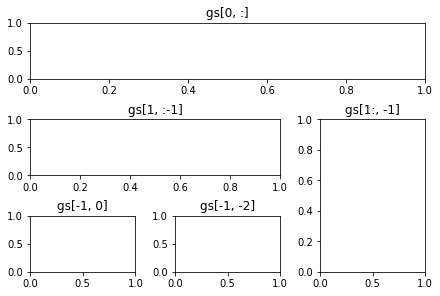

In [14]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3) # 使用add_gridspec方法来代替，省去了import matplotlib.gridspec的导入
print(type(gs))
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]') # 根据切片来控制长宽
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')
plt.show()

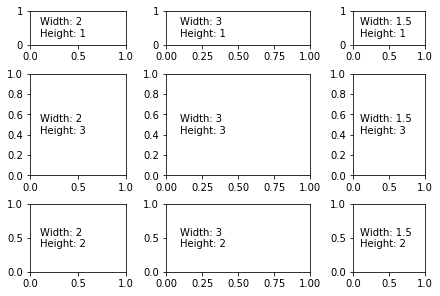

In [20]:
fig5 = plt.figure(constrained_layout=True)
# 更灵活的布局创建
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec5 = fig5.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig5.add_subplot(spec5[row, col])
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')
        
# 另一种方式
# 任何能被GridSpec实例接受的参数对于subplots()方法来说都可以通过gridspec_kw来接受
# gs_kw = dict(width_ratios=widths, height_ratios=heights)
# fig6, f6_axes = plt.subplots(ncols=3, nrows=3, constrained_layout=True,
#         gridspec_kw=gs_kw)
# for r, row in enumerate(f6_axes):
#     for c, ax in enumerate(row):
#         label = 'Width: {}\nHeight: {}'.format(widths[c], heights[r])
#         ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

plt.show()

<class 'matplotlib.gridspec.GridSpec'>


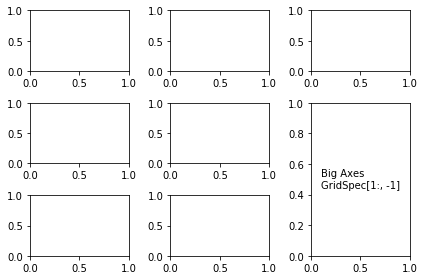

In [23]:
# subplots结合gridspec使用，有时候先简单的创建然后稍作修改，比直接针对目标去做要方便一些 
fig7, f7_axs = plt.subplots(ncols=3, nrows=3)
gs = f7_axs[1, 2].get_gridspec()
print(type(gs))

for ax in f7_axs[1:, -1]:
    ax.remove() # 去除右下的两个
axbig = fig7.add_subplot(gs[1:, -1]) # 添加一个大的
axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
               xycoords='axes fraction', va='center')
fig7.tight_layout() # 自动调整子图参数，防止重叠(刻度数字或字符重叠)
plt.show()

### GridSpec using SubplotSpec

<class 'matplotlib.gridspec.GridSpecFromSubplotSpec'>


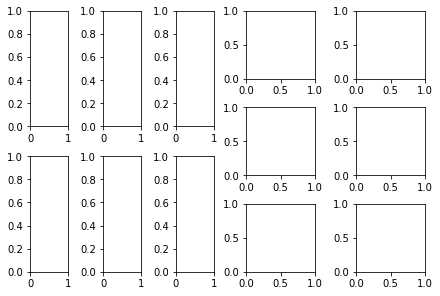

In [25]:
# SubplotSpec作用是对于给定GridSpec，指定其子图的位置
# 对子图进行布局设置，也可理解为“嵌套”，因为之前都是直接对GridSpec进行布局设置
# 好处：如图所示，布局更多样，比如整体来看没有所谓的第几行、第几列，不像上面的例子那样子图的边界都是对齐的，这样会更灵活能应对更复杂的情况
fig10 = plt.figure(constrained_layout=True)
gs0 = fig10.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 3)
gs01 = gs0[1].subgridspec(3, 2)
print(type(gs01))

for a in range(2):
    for b in range(3):
        fig10.add_subplot(gs00[a, b])
        fig10.add_subplot(gs01[b, a])
plt.show()